# Import Lib's and Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("datasets/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Basic Info 


In [4]:
df.shape

(1338, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Check for Null Values

In [6]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

**If any null then use below to get the count**

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Handle Null values

If null values are in:

        numerical columns:

                - if the column follows normal distribution then replace with mean
        
                 - else replace the null values with median

        categorical columns:

                - replace the null values with median of the column

### Numerical Values

In [8]:
df['age'].fillna(df['age'].median(),inplace=True) #there are no null values is just used for representation

### Catergorical Values

In [9]:
df['smoker'].fillna(df.age.mode(),inplace=True)

# Descriptive Statistics

In [10]:
df.describe() 

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


For above stats from min to max it is called **5 Point Summary in Statistics**

# Checking for Oultier in categorical values

In [11]:
#Get no of unique categories
df.region.nunique()

4

In [12]:
#Get the unique categories
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
#Get the count of each category
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

# Correlation 

In [14]:
df.corr(numeric_only=True) #corr of each columns with each other(correlation lies in range of -1,1)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [15]:
#Get the corr according our target variable
df.corr(numeric_only=True).charges.sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

use corr to select features say highly correlated then choose it

highly corr>+-0.9       
mulitcollinearity is high corr b/w to higly independent variables      
if two col have multicollinearity then consider dropping one of the column if necessary    
 -1<=r >=1

if r is +ve then x and y are positively correlated meaning if x increases y also increases

if r is -ve then x and y are negatively correalted meaning if x increases y  deacreases

if r is 0 then x and y are not correlated a circle in graph


# Visualisation


#refer to Data_Visualisation.ipynb

# Checking of Outliers

<AxesSubplot: ylabel='bmi'>

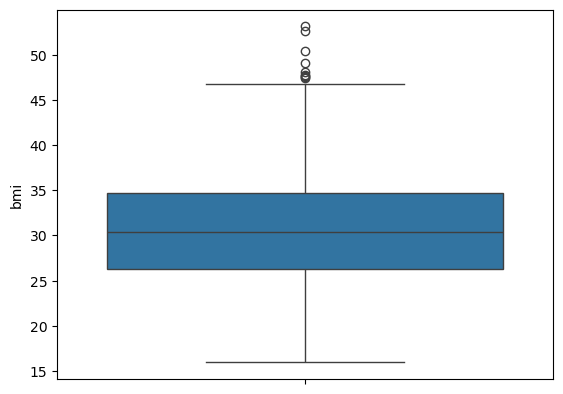

In [16]:
sns.boxplot(df.bmi)

# Outlier Removal Methods

There are three methods for outlier removal :     
- IQR ( Inter Quartile Range )
- Z-Score
- Percentile Method

### 1.IQR replacement and removal

In [17]:
Q1=df.bmi.quantile(0.25) 
Q3=df.bmi.quantile(0.75)
print(f"Q1: {Q1}\nQ3: {Q3}")

Q1: 26.29625
Q3: 34.69375


In [18]:
IQR = Q3-Q1
print(f"IQR: {IQR}")

IQR: 8.3975


In [19]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print(f"The upper limit is : {upper_limit}\nThe lower limit is: {lower_limit}")

The upper limit is : 47.290000000000006
The lower limit is: 13.7


In [20]:
#replacement
df['bmi'] = np.where(df['bmi'] > upper_limit,30,df['bmi'])
#removal
new_df=df[df.bmi<=upper_limit]
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot: ylabel='bmi'>

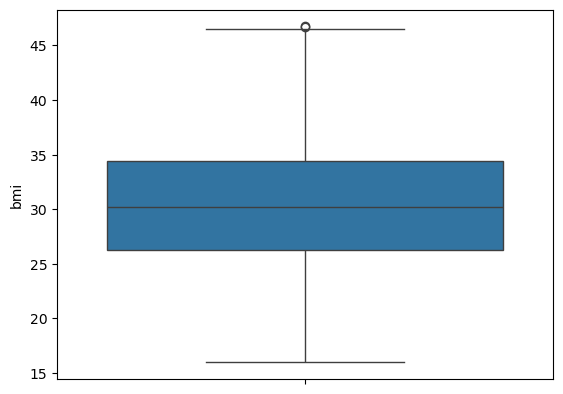

In [21]:
sns.boxplot(df.bmi)

### 2.Z-Score

In [22]:
from scipy import stats
bmi_zscore= stats.zscore(df.bmi)
bmi_zscore

0      -0.446551
1       0.548711
2       0.418157
3      -1.327366
4      -0.280391
          ...   
1333    0.073969
1334    0.235042
1335    1.070927
1336   -0.802607
1337   -0.248177
Name: bmi, Length: 1338, dtype: float64

In [23]:
new_df= df[np.abs(bmi_zscore)<=3] 
new_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot: ylabel='bmi'>

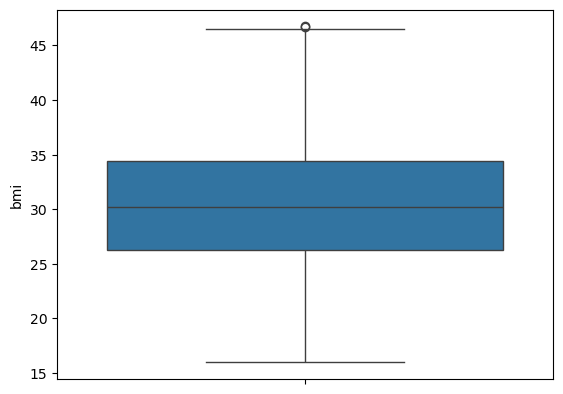

In [24]:
sns.boxplot(new_df.bmi)

### 3.Percentile 

In [25]:
p99= df.bmi.quantile(0.99) # to get the 99%centile 
print(p99)

44.72834999999999


In [26]:
df=df[df.bmi<=p99]

<AxesSubplot: ylabel='bmi'>

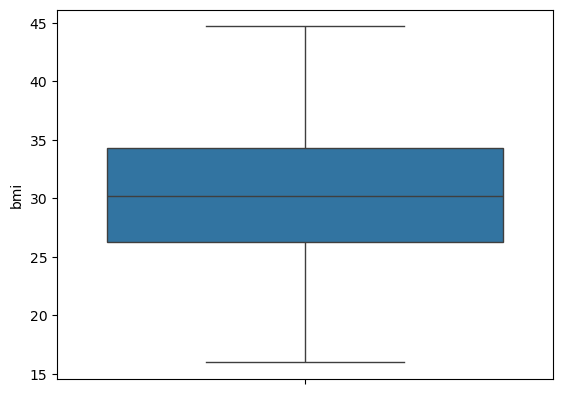

In [27]:
sns.boxplot(df.bmi)

In [28]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Encoding

There are 3 types of encoding:      
- Onehot Encoding
- Label Encoding
- Manual Encoding(Doing manual logic say for x there is y )

### 1.Onehot Encoding

In [29]:
df_onehotencoded = pd.get_dummies(df,columns=['region'],dtype=int)
df_onehotencoded.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0


<AxesSubplot: >

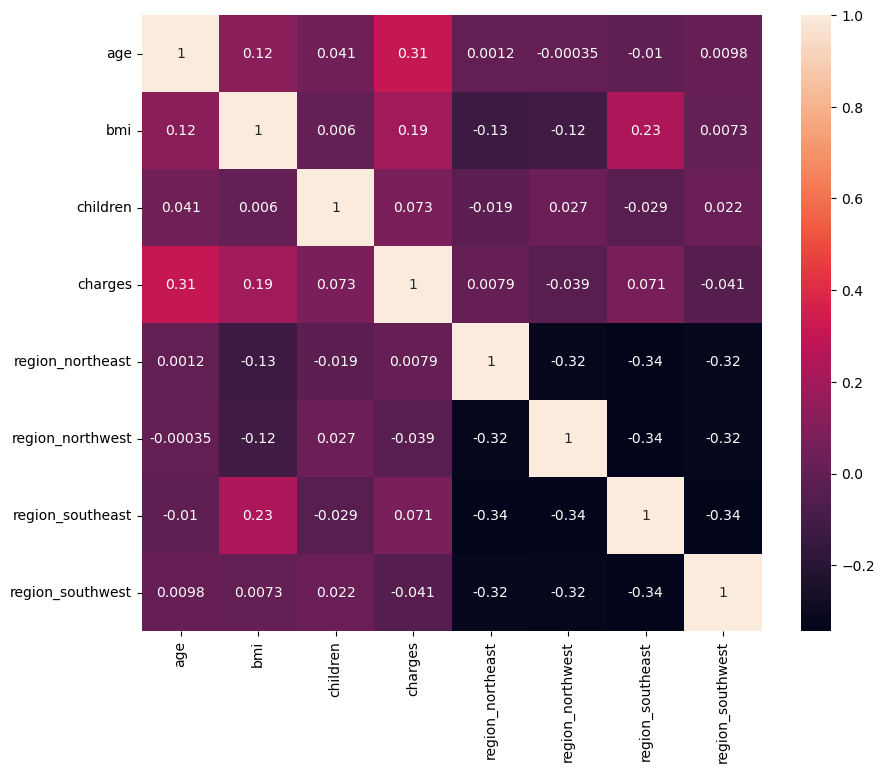

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df_onehotencoded.corr(numeric_only=True),annot = True)

### 2.Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [44]:
df.sex = le.fit_transform(df.sex)
df.smoker = le.fit_transform(df.smoker)
df.region = le.fit_transform(df.region)

In [45]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# X and y split

**Independent and dependent split**

In [48]:
x=df.drop(columns=['charges'])
y=df.charges
x.head()


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [49]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

# Scaling Data

**Do not scale the target varaible i.e., y**

In [50]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [52]:
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [53]:
x.head()

,age,sex,bmi,children,smoker,region
0,0.021739,0.0,0.415449,0.0,1.0,1.000000
1,0.000000,1.0,0.619694,0.2,0.0,0.666667
2,0.217391,1.0,0.592902,0.6,0.0,0.666667
3,0.326087,1.0,0.234690,0.0,0.0,0.333333
4,0.304348,1.0,0.449548,0.0,0.0,0.333333


# Train Test Split

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [56]:
X_train

,age,sex,bmi,children,smoker,region
1219,0.869565,1.0,0.255393,0.0,0.0,1.000000
175,0.978261,0.0,0.756437,0.0,1.0,1.000000
549,0.152174,0.0,0.882568,0.0,0.0,0.000000
81,0.586957,0.0,0.776792,0.0,0.0,0.000000
397,1.000000,1.0,0.335421,0.4,0.0,1.000000
...,...,...,...,...,...,...
763,0.565217,0.0,0.713987,0.0,0.0,0.000000
835,0.760870,1.0,0.505741,0.0,0.0,0.000000
1216,0.739130,1.0,0.644572,0.6,1.0,0.333333
559,0.021739,0.0,0.505741,0.0,0.0,0.333333


In [57]:
X_test

,age,sex,bmi,children,smoker,region
1294,0.152174,0.0,0.495477,0.0,1.0,1.000000
406,0.630435,0.0,0.265832,0.2,0.0,1.000000
1062,0.913043,0.0,0.082637,0.0,0.0,0.000000
202,0.913043,0.0,0.280967,0.0,0.0,0.333333
1191,0.369565,1.0,0.066110,0.2,0.0,0.333333
...,...,...,...,...,...,...
990,0.130435,1.0,0.582463,0.0,1.0,1.000000
817,0.826087,1.0,0.550800,0.4,1.0,0.666667
1323,0.934783,0.0,0.456159,0.0,1.0,0.333333
1051,0.391304,1.0,0.439631,0.6,0.0,0.333333


In [58]:
y_train

1233    11345.51900
175     48824.45000
554     17878.90068
81       7935.29115
398     14988.43200
           ...     
772     12797.20962
844     10072.05505
1230    60021.39897
565      2128.43105
692      2362.22905
Name: charges, Length: 926, dtype: float64

In [60]:
y_test

1308    33900.65300
407      8539.67100
1074    13204.28565
202     13012.20865
1205     5116.50040
           ...     
1001    34472.84100
826     43813.86610
1337    29141.36030
1063     6548.19505
1231    20167.33603
Name: charges, Length: 398, dtype: float64